In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataFolder = '../metadata/'
df = pd.read_csv(dataFolder + 'Austin_B-Cycle_Trips_extended_ordered.csv', index_col=0)
df.head()

/home/grayson/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:379: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Trip ID,Membership Type,Bicycle ID,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Day,Day of Week,Checkout Epoch Time,Return Epoch Time
0,9900333979,Founding Member (Austin B-cycle),966.0,9:12:00,2495.0,4th & Congress,2500.0,Republic Square,5,12,2013,21,5,1387638720,1387639020
1,9900333980,Annual Membership (Austin B-cycle),36.0,9:12:00,2496.0,8th & Congress,2497.0,Capitol Station / Congress & 11th,5,12,2013,21,5,1387638720,1387639020
2,9900333981,24-Hour Kiosk (Austin B-cycle),101.0,10:12:00,2500.0,Republic Square,2503.0,South Congress & James,19,12,2013,21,5,1387642320,1387643460
3,9900333982,24-Hour Kiosk (Austin B-cycle),252.0,13:12:00,2497.0,Capitol Station / Congress & 11th,2497.0,Capitol Station / Congress & 11th,4,12,2013,21,5,1387653120,1387653360
4,9900333983,24-Hour Kiosk (Austin B-cycle),287.0,13:12:00,2501.0,5th & Bowie,2495.0,4th & Congress,12,12,2013,21,5,1387653120,1387653840


In [2]:
hourlyCheckouts = np.zeros((24,7))
for index, row in df.iterrows():
    hour = int(row['Checkout Time'].split(':')[0])
    day = int(row['Day of Week'])
    hourlyCheckouts[hour][day] += 1

In [3]:
hourlyCheckouts = pd.DataFrame(hourlyCheckouts, index=[x for x in range(24)],
        columns= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
hourlyCheckouts

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1559.0,1395.0,1595.0,1604.0,2146.0,3158.0,3361.0
1,986.0,863.0,928.0,1170.0,1707.0,2633.0,2649.0
2,684.0,541.0,598.0,743.0,1381.0,2527.0,2874.0
3,264.0,227.0,197.0,287.0,500.0,745.0,795.0
4,186.0,190.0,197.0,178.0,250.0,303.0,349.0
5,309.0,364.0,336.0,335.0,334.0,223.0,233.0
6,1004.0,1110.0,1116.0,1011.0,991.0,363.0,398.0
7,2841.0,3506.0,3359.0,3363.0,2999.0,1107.0,929.0
8,5827.0,6141.0,6441.0,6033.0,5898.0,2749.0,2464.0
9,6263.0,6288.0,5891.0,6229.0,6632.0,5897.0,4934.0


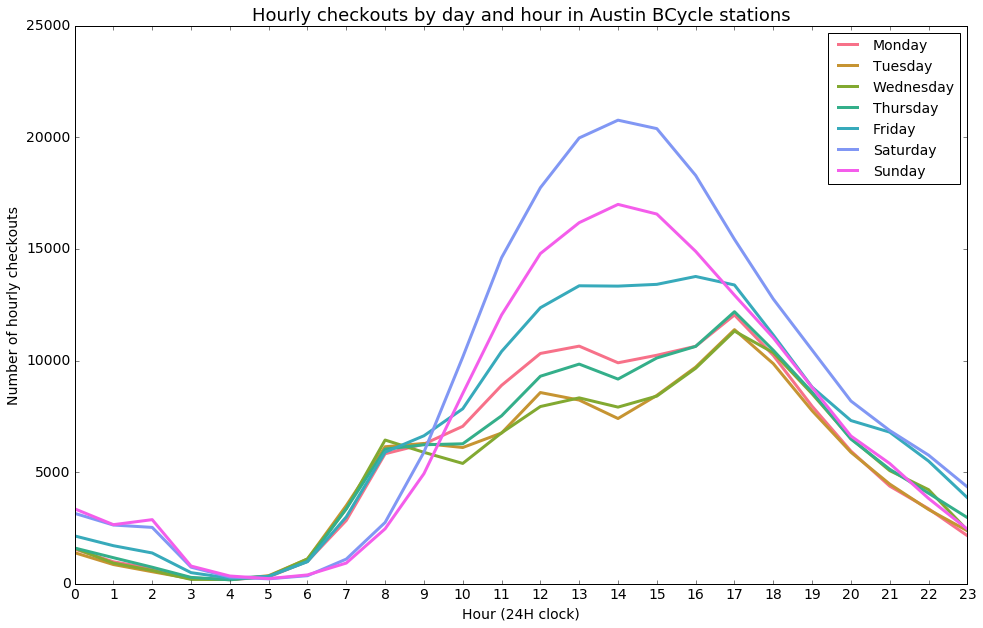

In [4]:
day_palette = sns.color_palette("husl", 7) # Need to have 7 distinct colours

fig, ax = plt.subplots(1,1, figsize=(16,10))
ax = hourlyCheckouts.plot.line(ax=ax, linewidth=3, color=day_palette)
ax.set_xlabel('Hour (24H clock)', fontdict={'size' : 14})
ax.set_ylabel('Number of hourly checkouts', fontdict={'size' : 14})
ax.set_title('Hourly checkouts by day and hour in Austin BCycle stations'
             ,fontdict={'size' : 18})
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.xaxis.set_ticks(hourlyCheckouts.index)
ax.legend(fontsize=14)
plt.show()

In [5]:
weeklyBCycle = df[df['Year']>=2015]
weeklyBCycle.head()

,Trip ID,Membership Type,Bicycle ID,Checkout Time,Checkout Kiosk ID,Checkout Kiosk,Return Kiosk ID,Return Kiosk,Trip Duration Minutes,Month,Year,Day,Day of Week,Checkout Epoch Time,Return Epoch Time
157160,9900003377,Walk Up,861.0,0:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2822.0,East 6th at Robert Martinez,11,1,2015,1,3,1420092720,1420093380
157161,9900003378,Walk Up,980.0,0:12:00,2498.0,Convention Center / 4th St. @ MetroRail,2822.0,East 6th at Robert Martinez,11,1,2015,1,3,1420092720,1420093380
157162,9900003376,Walk Up,382.0,0:12:00,2564.0,5th & San Marcos,2542.0,Plaza Saltillo,4,1,2015,1,3,1420092720,1420092960
157163,9900003375,Walk Up,248.0,0:12:00,2564.0,5th & San Marcos,2542.0,Plaza Saltillo,4,1,2015,1,3,1420092720,1420092960
157164,9900003387,Walk Up,140.0,1:12:00,2495.0,4th & Congress,2542.0,Plaza Saltillo,13,1,2015,1,3,1420096320,1420097100


In [6]:
weeklyDockless = pd.read_csv('../metadata/Dockless_Vehicle_Trips_ordered.csv')
weeklyDockless = weeklyDockless[weeklyDockless['start_time_atx'] <= '2018-09-30']
weeklyDockless.head()

,ID,Vehicle Type,Trip Duration,Trip Distance,Start Time,End Time,Modified Date,Month,Hour,Day of Week,start_time_atx,end_time_atx,Council District (Start),Council District (End)
0,3990866,bicycle,6,5,04/02/2017 01:44:00 AM,04/02/2017 01:50:00 AM,12/01/2018 10:27:10 PM,4,20,6,2017-04-01 20:44:00,04/01/2017 08:50:00 PM,0,0
1,3994244,bicycle,5,0,04/02/2017 02:09:00 AM,04/02/2017 02:14:00 AM,12/01/2018 10:29:05 PM,4,21,6,2017-04-01 21:09:00,04/01/2017 09:14:00 PM,0,0
2,3998389,bicycle,6,1,04/02/2017 02:09:00 AM,04/02/2017 02:15:00 AM,12/01/2018 10:13:06 PM,4,21,6,2017-04-01 21:09:00,04/01/2017 09:15:00 PM,0,0
3,3995261,bicycle,4,0,04/02/2017 02:28:00 AM,04/02/2017 02:32:00 AM,12/01/2018 10:18:45 PM,4,21,6,2017-04-01 21:28:00,04/01/2017 09:32:00 PM,0,0
4,3995078,bicycle,6,1,04/02/2017 02:31:00 AM,04/02/2017 02:37:00 AM,12/01/2018 10:24:59 PM,4,21,6,2017-04-01 21:31:00,04/01/2017 09:37:00 PM,0,0


In [7]:
from datetime import datetime, timedelta

def getWeeks(start, end):
    monday1 = (start - timedelta(days=start.weekday()))
    monday2 = (end - timedelta(days=end.weekday()))
    return (monday2 - monday1).days / 7

startTime = str(weeklyBCycle['Month'].iloc[0]) + '-' + \
        str(weeklyBCycle['Day'].iloc[0]) + '-' + str(weeklyBCycle['Year'].iloc[0])
startTime = datetime.strptime(startTime, '%m-%d-%Y')
endTime = datetime.strptime('09-30-2018', '%m-%d-%Y')
totalWeeks = getWeeks(startTime, endTime)

weeklyTrips = np.zeros((totalWeeks+1, 2))

In [8]:
for index, row in weeklyBCycle.iterrows():
    time = str(row['Month']) + '-' + str(row['Day']) + '-' + str(row['Year'])
    time = datetime.strptime(time, '%m-%d-%Y')
    week = getWeeks(startTime, time)
    weeklyTrips[week][0] += 1

In [9]:
for index, row in weeklyDockless.iterrows():
    time = row['start_time_atx']
    time = datetime.strptime(time, '%Y-%m-%d %H:%M:%S')
    week = getWeeks(startTime, time)
    weeklyTrips[week][1] += 1

In [10]:
weeklyTrips = np.delete(weeklyTrips, (0), axis=0).astype(np.int32)
weeklyTrips = pd.DataFrame(weeklyTrips, index=[x for x in range(1,totalWeeks+1)],
        columns= ['BCycle', 'Dockless'])
weeklyTrips.head()

,BCycle,Dockless
1,970,0
2,2527,0
3,2170,0
4,1795,0
5,2105,0


In [11]:
for index, row in weeklyTrips.iterrows():
    if row['Dockless'] != 0:
        print(index)
        break

117


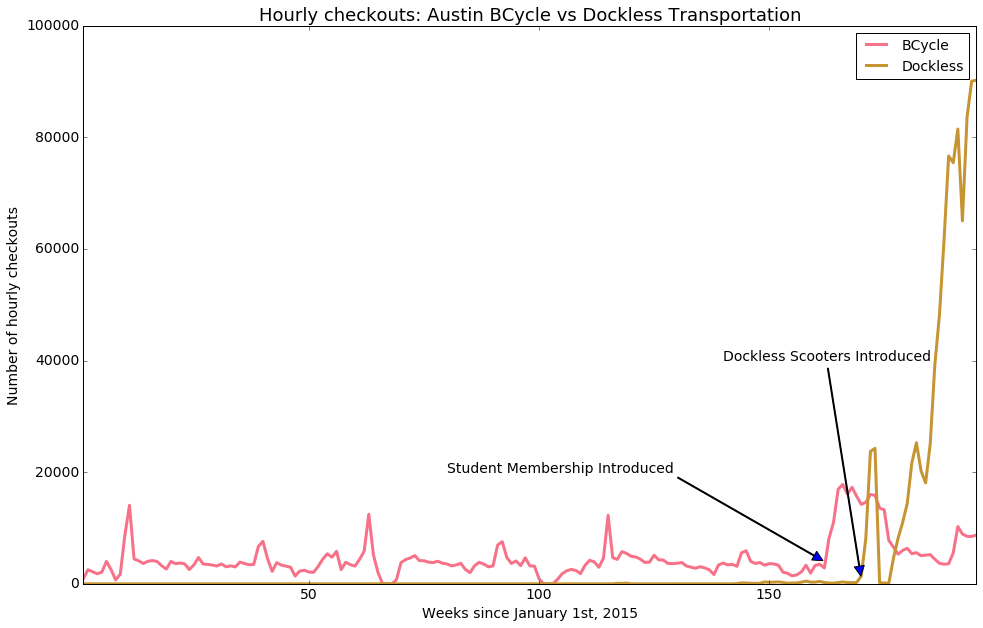

In [12]:
day_palette = sns.color_palette("husl", 7) # Need to have 7 distinct colours

fig, ax = plt.subplots(1,1, figsize=(16,10))
ax = weeklyTrips.plot.line(ax=ax, linewidth=3, color=day_palette)
ax.set_xlabel('Weeks since January 1st, 2015', fontdict={'size' : 14})
ax.set_ylabel('Number of hourly checkouts', fontdict={'size' : 14})
ax.set_title('Hourly checkouts: Austin BCycle vs Dockless Transportation'
             ,fontdict={'size' : 18})
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# ax.xaxis.set_ticks(weeklyTrips.index)
ax.legend(fontsize=14)
ax.annotate(s="Student Membership Introduced", xy=(162, 4000), xytext=(80,20000), 
           arrowprops={'width':1, 'headwidth':10, 'headlength':10, 'shrink':.01}, size=14)
ax.annotate(s="Dockless Scooters Introduced", xy=(170, 1000), xytext=(140,40000), 
           arrowprops={'width':1, 'headwidth':10, 'headlength':10, 'shrink':.01}, size=14)
plt.show()

In [13]:
weeklyTripsShortened = weeklyTrips.iloc[104:,:].copy().reset_index(drop=True)
print(weeklyTrips.tail())
print(weeklyTripsShortened.tail())

     BCycle  Dockless
191   10256     81496
192    8921     65048
193    8508     83641
194    8480     90070
195    8735     90250
    BCycle  Dockless
86   10256     81496
87    8921     65048
88    8508     83641
89    8480     90070
90    8735     90250


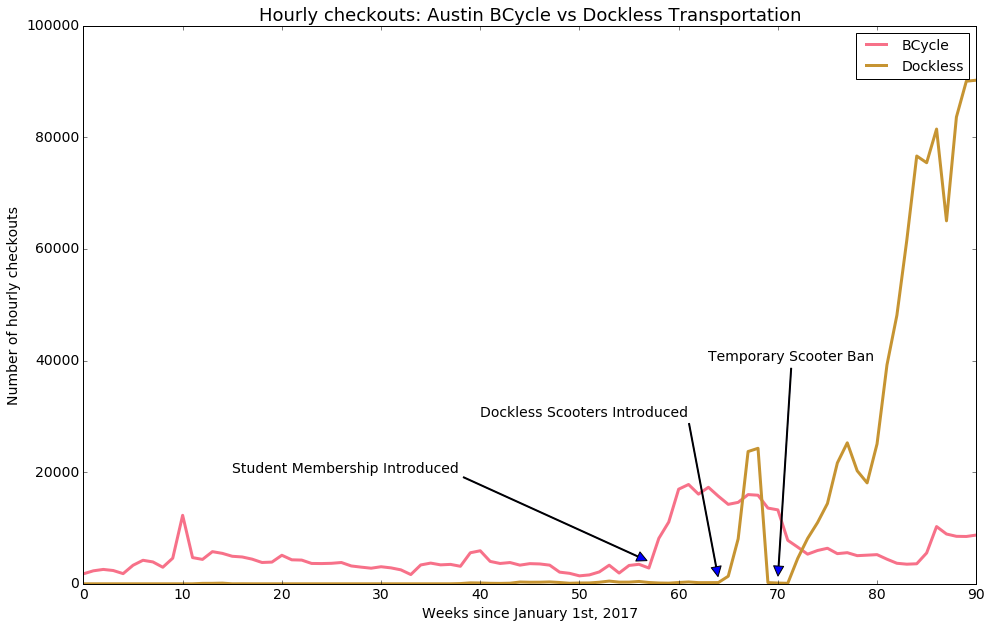

In [21]:
day_palette = sns.color_palette("husl", 7) # Need to have 7 distinct colours

fig, ax = plt.subplots(1,1, figsize=(16,10))
ax = weeklyTripsShortened.plot.line(ax=ax, linewidth=3, color=day_palette)
ax.set_xlabel('Weeks since January 1st, 2017', fontdict={'size' : 14})
ax.set_ylabel('Number of hourly checkouts', fontdict={'size' : 14})
ax.set_title('Hourly checkouts: Austin BCycle vs Dockless Transportation'
             ,fontdict={'size' : 18})
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(fontsize=14)
ax.annotate(s="Student Membership Introduced", xy=(57, 4000), xytext=(15,20000), 
           arrowprops={'width':1, 'headwidth':10, 'headlength':10, 'shrink':.01}, size=14)
ax.annotate(s="Dockless Scooters Introduced", xy=(64, 1000), xytext=(40,30000), 
           arrowprops={'width':1, 'headwidth':10, 'headlength':10, 'shrink':.01}, size=14)
ax.annotate(s="Temporary Scooter Ban", xy=(70, 1000), xytext=(63,40000), 
           arrowprops={'width':1, 'headwidth':10, 'headlength':10, 'shrink':.01}, size=14)
plt.show()